C:\Users\tamil\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 
Fold 1 - RMSE: 35.5914, R² Score: 0.9767


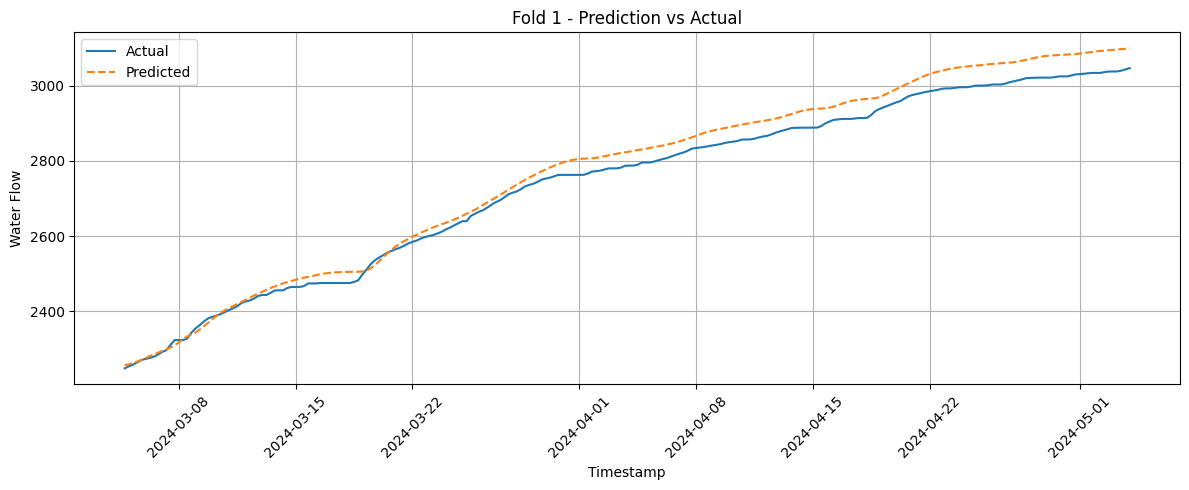

C:\Users\tamil\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 
Fold 2 - RMSE: 5.2223, R² Score: 0.9955


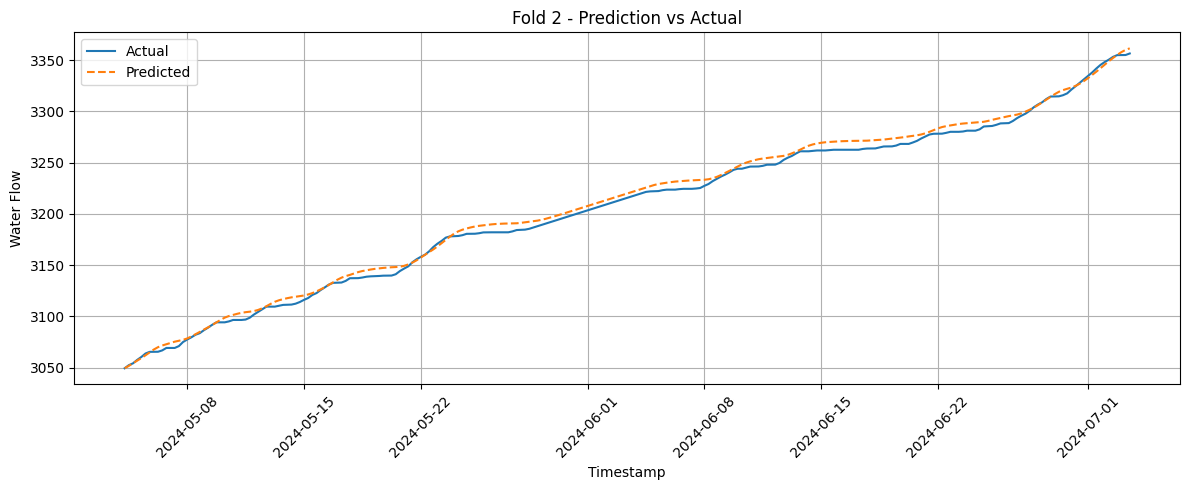

C:\Users\tamil\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 
Fold 3 - RMSE: 6.2640, R² Score: 0.9983


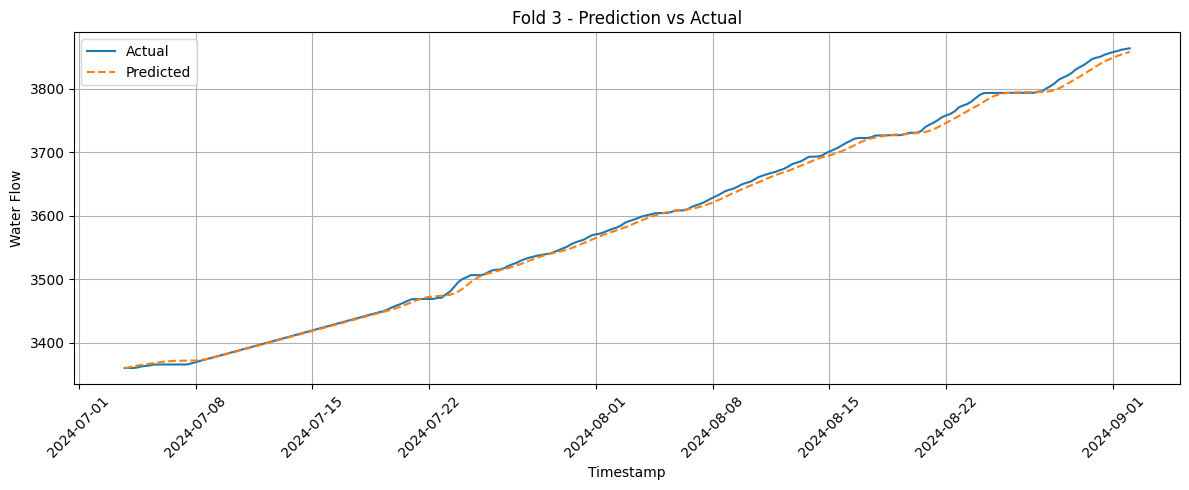

C:\Users\tamil\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step 
Fold 4 - RMSE: 6.8061, R² Score: 0.9977


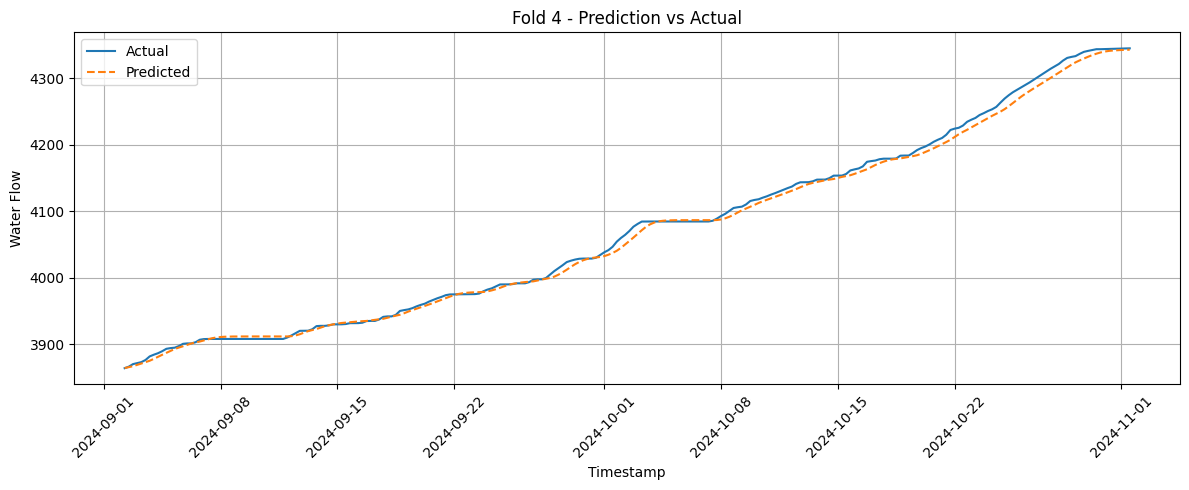

C:\Users\tamil\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 
Fold 5 - RMSE: 3.2485, R² Score: 0.9991


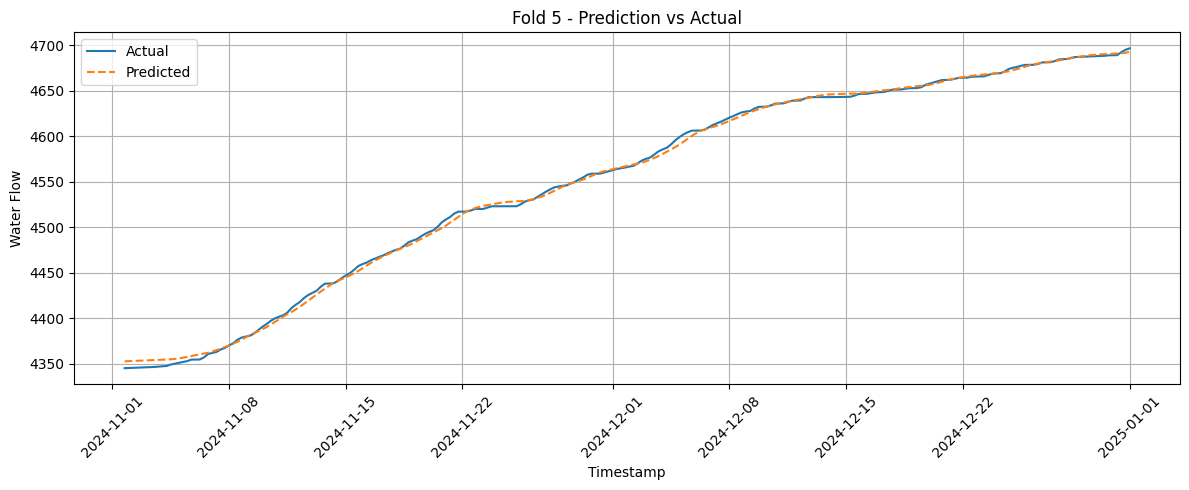

In [2]:
from sklearn.metrics import mean_squared_error, r2_score

# ... [everything before remains unchanged] ...

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
fold = 1
timestamps = df.index[seq_length:]

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    test_timestamps = timestamps[test_idx]

    # Build model
    model = Sequential([
        GRU(64, return_sequences=False, input_shape=(seq_length, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)

    # Predict and inverse scale
    y_pred = model.predict(X_test)
    y_test_inv = scaler.inverse_transform(np.column_stack([y_test]*df.shape[1]))[:, 0]
    y_pred_inv = scaler.inverse_transform(np.column_stack([y_pred]*df.shape[1]))[:, 0]

    # Evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    r2 = r2_score(y_test_inv, y_pred_inv)
    print(f"Fold {fold} - RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

    # Plot
    plt.figure(figsize=(12, 5))
    plt.plot(test_timestamps, y_test_inv, label="Actual")
    plt.plot(test_timestamps, y_pred_inv, label="Predicted", linestyle="--")
    plt.title(f"Fold {fold} - Prediction vs Actual")
    plt.xlabel("Timestamp")
    plt.ylabel("Water Flow")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

    fold += 1
